# Spam Detection using Machine Learning

### Step 1: Import Libraries

Import Libraries: All necessary libraries are imported at the beginning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from wordcloud import WordCloud
from collections import Counter
import pickle

### Step 2: Load Data

Load Data: The dataset is loaded from a CSV file and a sample is displayed.

In [2]:

df = pd.read_csv('spam.csv', encoding='latin1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4218,ham,Anything lor if they all go then i go lor...,NaN,NaN,NaN
4025,ham,Oh ok.. Wat's ur email?,NaN,NaN,NaN
5280,ham,"Vikky, come around &lt;TIME&gt; ..",NaN,NaN,NaN
3406,ham,Beautiful Truth against Gravity.. Read careful...,NaN,NaN,NaN
706,ham,So when do you wanna gym harri,NaN,NaN,NaN


### Step 3: Data Cleaning

Data Cleaning: Unnecessary columns are dropped, the target column is encoded, and duplicates are removed. Missing values and duplicates are checked.

In [3]:

df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df = df.drop_duplicates(keep='first')

In [4]:
# Check for missing values and duplicates
print("Missing values:\n", df.isnull().sum())
print("Duplicate values:\n", df.duplicated().sum())

Missing values:
 target    0
text      0
dtype: int64
Duplicate values:
 0


### Step 4: Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA): Various visualizations are created to understand the distribution of spam and ham messages, including bar plots, histograms, pair plots, and a correlation heatmap.

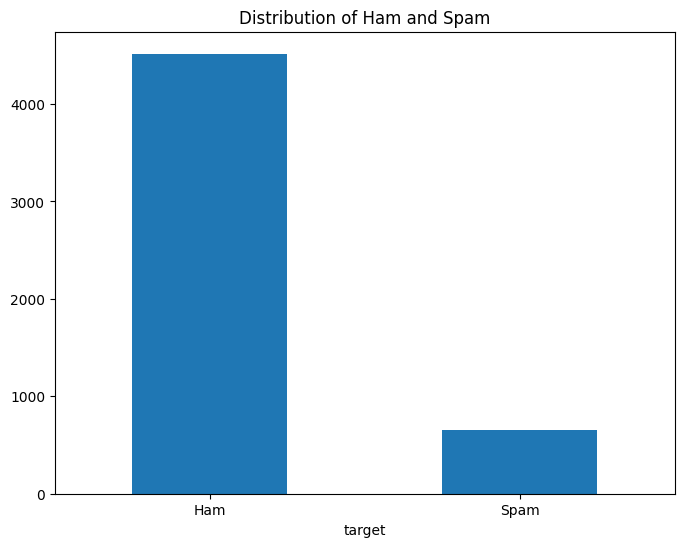

In [5]:

plt.figure(figsize=(8, 6))
df['target'].value_counts().plot(kind='bar', title='Distribution of Ham and Spam')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'], rotation=0)
plt.show()

In [6]:
# Character, word, and sentence counts
nltk.download('punkt')
nltk.download('stopwords')
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shaunak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shaunak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


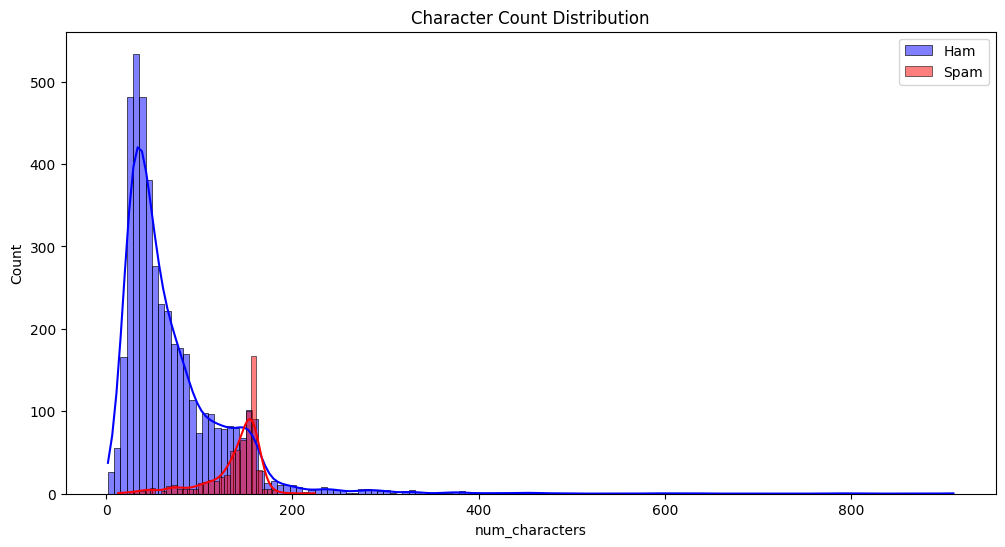

In [8]:
# Visualize Character Counts
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_characters'], color='blue', label='Ham', kde=True)
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='Spam', kde=True)
plt.title('Character Count Distribution')
plt.legend()
plt.show()

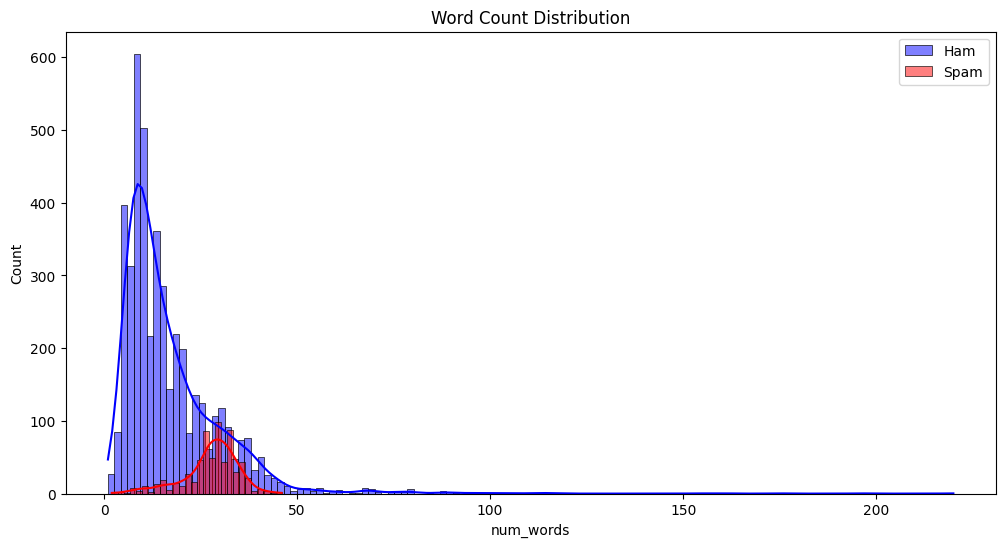

In [9]:
# Visualize Word Counts
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_words'], color='blue', label='Ham', kde=True)
sns.histplot(df[df['target'] == 1]['num_words'], color='red', label='Spam', kde=True)
plt.title('Word Count Distribution')
plt.legend()
plt.show()

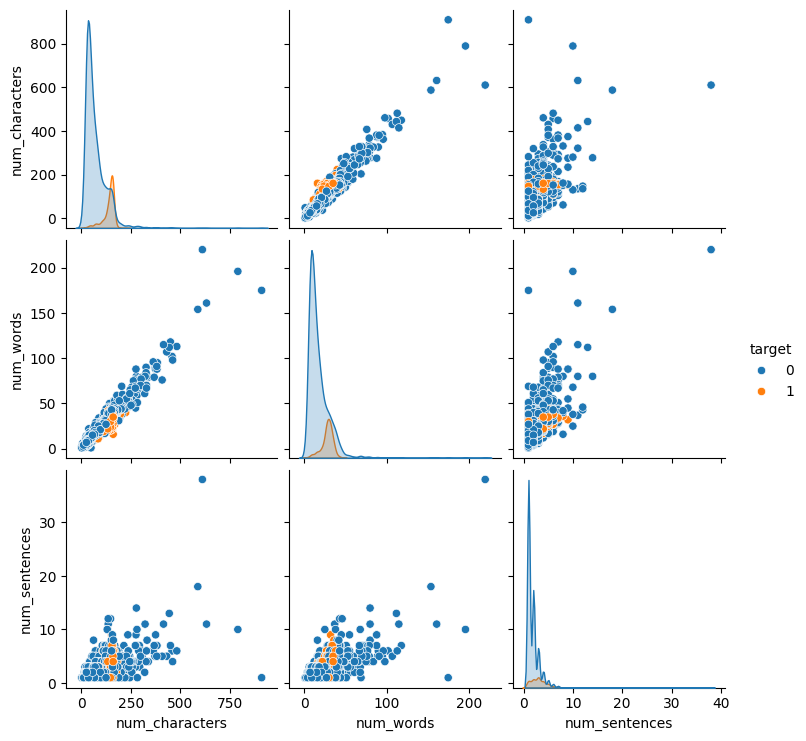

In [10]:
# Pairplot
sns.pairplot(df, hue='target')
plt.show()

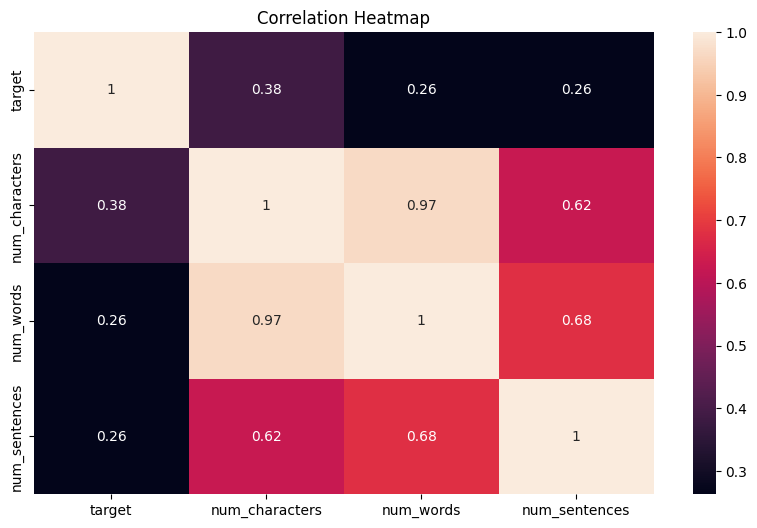

In [11]:
# Correlation Heatmap
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

### Step 5: Text Preprocessing

Text Preprocessing: The text is transformed by converting to lowercase, tokenizing, removing stop words, and stemming. Word clouds for spam and ham messages are generated.

In [12]:

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [ps.stem(word) for word in text if word.isalnum() and word not in stopwords.words('english')]
    return " ".join(text)

df['transformed_text'] = df['text'].apply(transform_text)


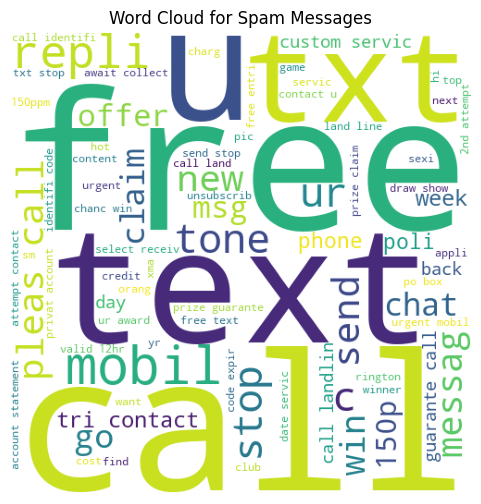

In [13]:
# Word Cloud for Spam Messages
spam_wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white').generate(" ".join(df[df['target'] == 1]['transformed_text']))
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()

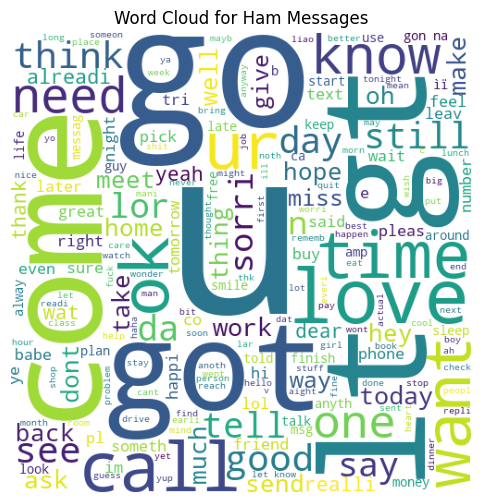

In [14]:
# Word Cloud for Ham Messages
ham_wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white').generate(" ".join(df[df['target'] == 0]['transformed_text']))
plt.figure(figsize=(15, 6))
plt.imshow(ham_wc)
plt.axis('off')
plt.title('Word Cloud for Ham Messages')
plt.show()


Common Words Visualization: The most common words in spam and ham messages are visualized using bar plots.

In [15]:
# Common Words in Spam
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    spam_corpus.extend(msg.split())

common_spam_words = Counter(spam_corpus).most_common(30)
df_common_spam_words = pd.DataFrame(common_spam_words, columns =['Word', 'Count'])


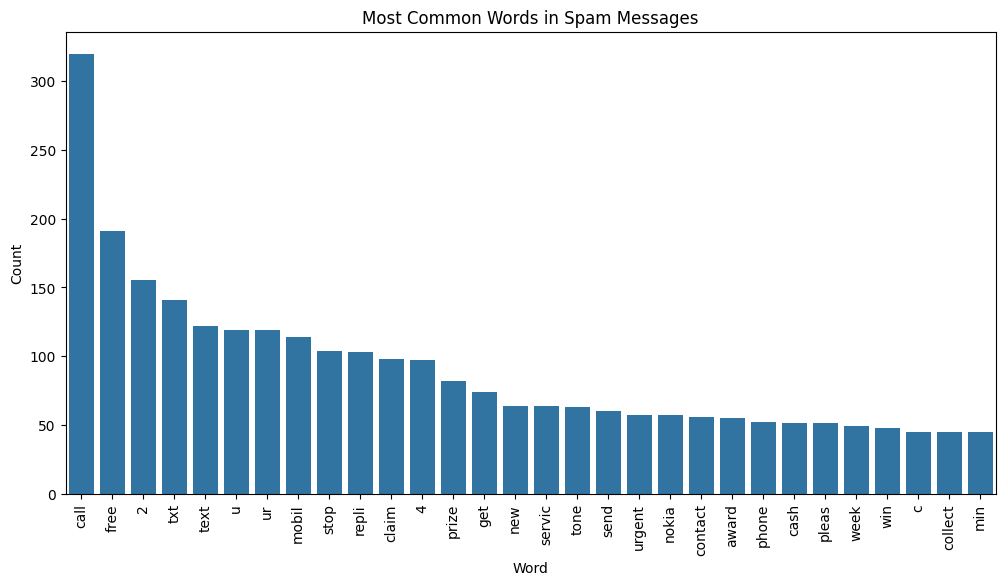

In [16]:
# Create the barplot for common spam words
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Count', data=df_common_spam_words)
plt.xticks(rotation='vertical')
plt.title('Most Common Words in Spam Messages')
plt.show()

In [17]:
# Common Words in Ham
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    ham_corpus.extend(msg.split())

common_ham_words = Counter(ham_corpus).most_common(30)
df_common_ham_words = pd.DataFrame(common_ham_words, columns=['Word', 'Count'])


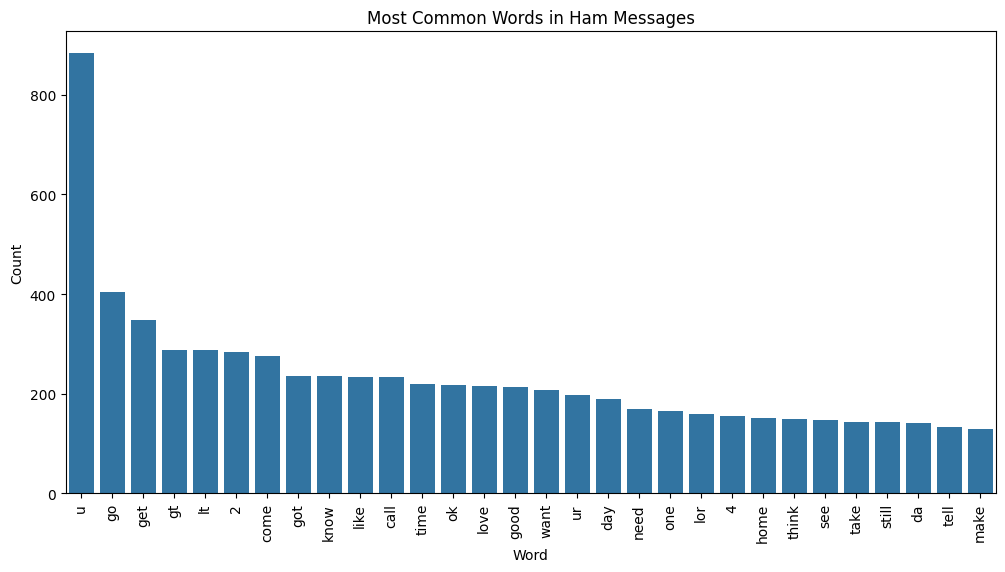

In [18]:
# Create the barplot for common ham words
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Count', data=df_common_ham_words)
plt.xticks(rotation='vertical')
plt.title('Most Common Words in Ham Messages')
plt.show()

### Step 6: Text Vectorization

Text Vectorization: The transformed text is vectorized using TF-IDF with a maximum of 3000 features.

In [19]:
# Step 6: Text Vectorization
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

### Step 7: Train-Test Split

Train-Test Split: The dataset is split into training and testing sets.

In [20]:
# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


### Step 8: Model Building

Model Building: The Multinomial Naive Bayes model is trained on the training data.

In [21]:
# Step 8: Model Building
mnb = MultinomialNB()
mnb.fit(X_train, y_train)


MultinomialNB()

### Step 9: Evaluation

Evaluation: The model's performance is evaluated using accuracy, precision, and a confusion matrix.

In [22]:
# Step 9: Evaluation
y_pred = mnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Confusion Matrix:\n", confusion)


Accuracy: 0.9709864603481625
Precision: 1.0
Confusion Matrix:
 [[896   0]
 [ 30 108]]


### Step 10: Save the Model and Vectorizer

Save the Model and Vectorizer: The trained model and vectorizer are saved for future use.

In [23]:
# Step 10: Save the Model and Vectorizer
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))


Visualization of Performance Metrics: A bar plot is created to visualize the model's performance metrics.

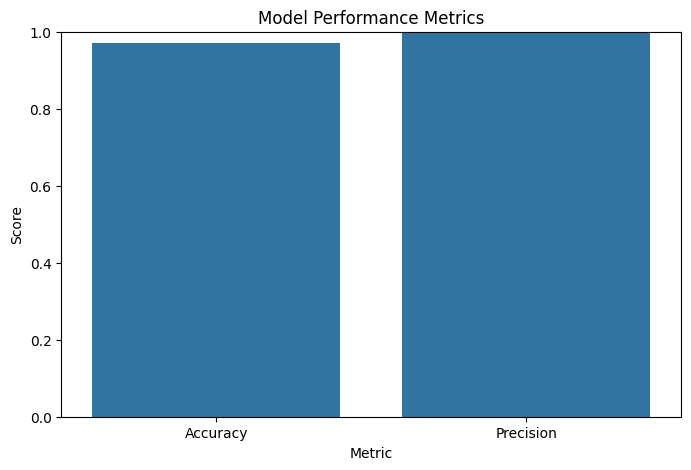

In [24]:

# Visualization of Performance Metrics
performance_df = pd.DataFrame({'Metric': ['Accuracy', 'Precision'], 'Score': [accuracy, precision]})
plt.figure(figsize=(8, 5))
sns.barplot(x='Metric', y='Score', data=performance_df)
plt.ylim(0, 1)
plt.title('Model Performance Metrics')
plt.show()